<a href="https://colab.research.google.com/github/satwikavarshinimungara/satwikamungara/blob/main/appleleafdisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/apple-leaf-disease (1)'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/apple-leaf-disease (1)/Apple_black_rot/Black_rot (117).JPG
/content/drive/MyDrive/apple-leaf-disease (1)/Apple_black_rot/Black_rot (150).JPG
/content/drive/MyDrive/apple-leaf-disease (1)/Apple_black_rot/Black_rot (147).JPG
/content/drive/MyDrive/apple-leaf-disease (1)/Apple_black_rot/Black_rot (145).JPG
/content/drive/MyDrive/apple-leaf-disease (1)/Apple_black_rot/Black_rot (143).JPG
/content/drive/MyDrive/apple-leaf-disease (1)/Apple_black_rot/Black_rot (146).JPG
/content/drive/MyDrive/apple-leaf-disease (1)/Apple_black_rot/Black_rot (144).JPG
/content/drive/MyDrive/apple-leaf-disease (1)/Apple_black_rot/Black_rot (141).JPG
/content/drive/MyDrive/apple-leaf-disease (1)/Apple_black_rot/Black_rot (142).JPG
/content/drive/MyDrive/apple-leaf-disease (1)/Apple_black_rot/Black_rot (140).JPG
/content/drive/MyDrive/apple-leaf-disease (1)/Apple_black_rot/Black_rot (139).JPG
/content/drive/MyDrive/apple-leaf-disease (1)/Apple_black_rot/Black_rot (138).JPG
/content/drive/M

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [4]:
DATASET="/content/drive/MyDrive/apple-leaf-disease (1)"
for file in os.listdir(DATASET):
    print(file)

Apple_black_rot
Apple_scab
Apple_cedar_rust


In [5]:
CLASS_list = ['Apple_cedar_rust','Apple_black_rot','Apple_scab']
CLASS_list

['Apple_cedar_rust', 'Apple_black_rot', 'Apple_scab']

In [7]:
DATASET = "/content/drive/MyDrive/apple-leaf-disease (1)"

print(len(os.listdir(os.path.join(DATASET, 'Apple_cedar_rust'))))
print(len(os.listdir(os.path.join(DATASET, 'Apple_scab'))))
print(len(os.listdir(os.path.join(DATASET, 'Apple_black_rot'))))

320
150
340


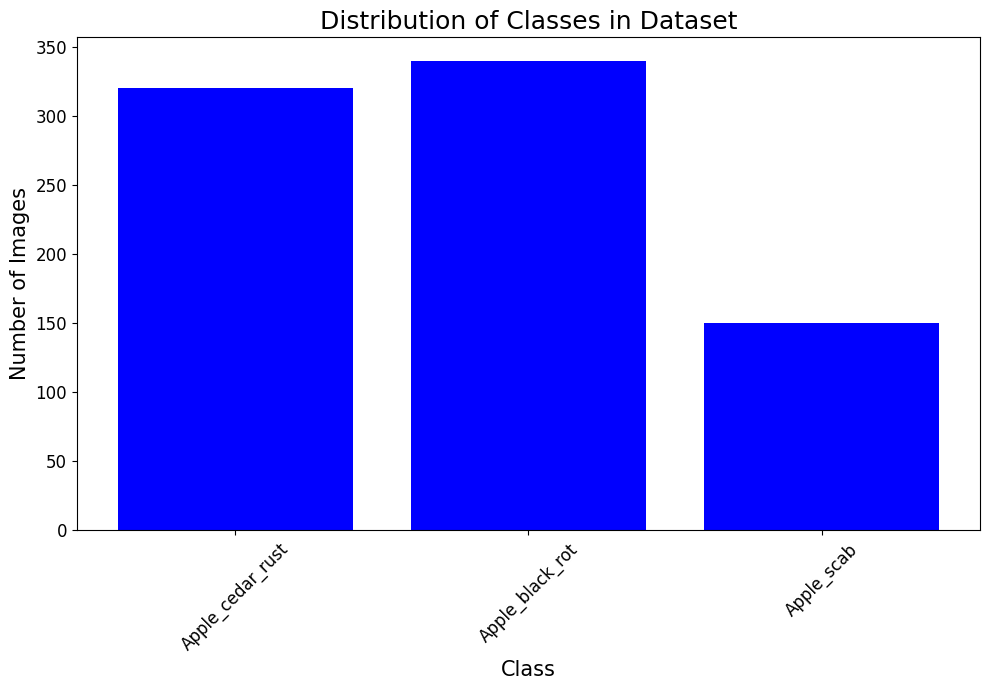

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt

DATASET = "/content/drive/MyDrive/apple-leaf-disease (1)"
CLASS_list = ['Apple_cedar_rust','Apple_black_rot','Apple_scab']
base_ds_dist = np.array([len(os.listdir(os.path.join(DATASET, i))) for i in CLASS_list])
plt.figure(figsize=(10, 7))
plt.bar(CLASS_list, base_ds_dist, color='blue')
plt.xlabel('Class', fontsize=15)
plt.ylabel('Number of Images', fontsize=15)
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for better visibility
plt.yticks(fontsize=12)  # Set y-axis tick label size
plt.title('Distribution of Classes in Dataset', fontsize=18)  # Add a title if needed
plt.tight_layout()  # Adjust layout for better fit
plt.show()

In [9]:
for folder in os.listdir(DATASET):
    folder_path = os.path.join(DATASET, folder)
    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
            file_path = os.path.join(folder_path, filename)
            image = cv2.imread(file_path)
            if image is not None:
                height, width, channels = image.shape
                print(f"Image: {filename} - Size: {width}x{height} - Channels: {channels}")
            else:
                print(f"Failed to read image {filename}")

Image: Black_rot (117).JPG - Size: 256x256 - Channels: 3
Image: Black_rot (150).JPG - Size: 256x256 - Channels: 3
Image: Black_rot (147).JPG - Size: 256x256 - Channels: 3
Image: Black_rot (145).JPG - Size: 256x256 - Channels: 3
Image: Black_rot (143).JPG - Size: 256x256 - Channels: 3
Image: Black_rot (146).JPG - Size: 256x256 - Channels: 3
Image: Black_rot (144).JPG - Size: 256x256 - Channels: 3
Image: Black_rot (141).JPG - Size: 256x256 - Channels: 3
Image: Black_rot (142).JPG - Size: 256x256 - Channels: 3
Image: Black_rot (140).JPG - Size: 256x256 - Channels: 3
Image: Black_rot (139).JPG - Size: 256x256 - Channels: 3
Image: Black_rot (138).JPG - Size: 256x256 - Channels: 3
Image: Black_rot (136).JPG - Size: 256x256 - Channels: 3
Image: Black_rot (137).JPG - Size: 256x256 - Channels: 3
Image: Black_rot (135).JPG - Size: 256x256 - Channels: 3
Image: Black_rot (132).JPG - Size: 256x256 - Channels: 3
Image: Black_rot (133).JPG - Size: 256x256 - Channels: 3
Image: Black_rot (131).JPG - Si

In [10]:
dataset_path = '/content/drive/MyDrive/apple-leaf-disease (1)'
if not os.path.exists(dataset_path):
    raise FileNotFoundError(f"Dataset directory not found: {dataset_path}")

print("Contents of dataset directory:")
for root, dirs, files in os.walk(dataset_path):
    level = root.replace(dataset_path, '').count(os.sep)
    indent = ' ' * 4 * (level)
    print(f"{indent}{os.path.basename(root)}/")
    subindent = ' ' * 4 * (level + 1)
    for f in files:
        print(f"{subindent}{f}")

Contents of dataset directory:
apple-leaf-disease (1)/
    Apple_black_rot/
        Black_rot (117).JPG
        Black_rot (150).JPG
        Black_rot (147).JPG
        Black_rot (145).JPG
        Black_rot (143).JPG
        Black_rot (146).JPG
        Black_rot (144).JPG
        Black_rot (141).JPG
        Black_rot (142).JPG
        Black_rot (140).JPG
        Black_rot (139).JPG
        Black_rot (138).JPG
        Black_rot (136).JPG
        Black_rot (137).JPG
        Black_rot (135).JPG
        Black_rot (132).JPG
        Black_rot (133).JPG
        Black_rot (131).JPG
        Black_rot (129).JPG
        Black_rot (134).JPG
        Black_rot (128).JPG
        Black_rot (130).JPG
        Black_rot (126).JPG
        Black_rot (119).JPG
        Black_rot (125).JPG
        Black_rot (120).JPG
        Black_rot (122).JPG
        Black_rot (124).JPG
        Black_rot (123).JPG
        Black_rot (127).JPG
        Black_rot (121).JPG
        Black_rot (118).JPG
        Black_rot (115).JPG


Display Images

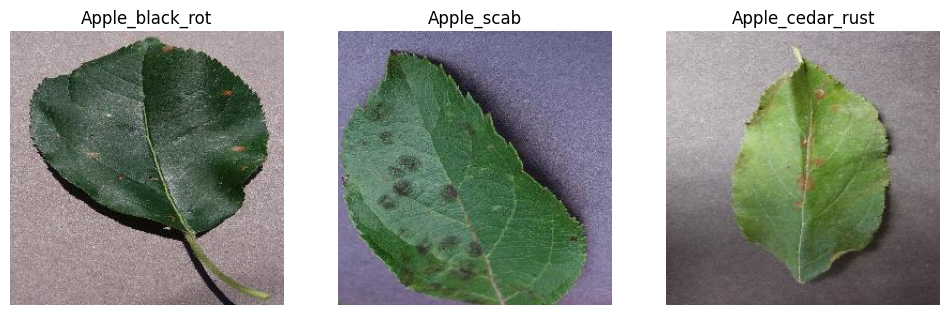

In [11]:
DATASET = "/content/drive/MyDrive/apple-leaf-disease (1)"
# Initialization
plt.figure(figsize=(12, 4))
# List all categories in the dataset directory
categories = os.listdir(DATASET)

for i, category in enumerate(categories):
    category_path = os.path.join(DATASET, category)
    images = os.listdir(category_path)
    random_image_name = random.choice(images)
    image_path = os.path.join(category_path, random_image_name)
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(1, len(categories), i + 1)
    plt.imshow(img)
    plt.title(category)
    plt.axis('off')

plt.show()

Image Data Transformation

In [13]:
IMG_SIZE = 224
DATASET = '/content/drive/MyDrive/apple-leaf-disease (1)'

Image resize

In [14]:
def preprocess_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB (OpenCV uses BGR by default)
    img = cv2.resize(img, (224, 224))  # Resize image to 224x224
    img = img.astype('float32') / 255.0  # Normalize pixel values to [0, 1]
    return img

# Example usage:
image_path = '//content/drive/MyDrive/apple-leaf-disease (1)/Apple_black_rot/Black_rot (1).JPG'
preprocessed_img = preprocess_image(image_path)

Data preprocessing

In [15]:
def load_data(data_path):
    images = []
    labels = []
    categories = os.listdir(data_path)
    label_dict = {category: i for i, category in enumerate(categories)}

    for category in categories:
        class_path = os.path.join(data_path, category)
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            images.append(img)
            labels.append(label_dict[category])

    images = np.array(images)
    labels = np.array(labels)
    return images, labels, label_dict

images, labels, label_dict = load_data(DATASET)

Equalizes images

In [16]:
images = images / 255.0

Data Augmentaion

In [17]:
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

Build the Mobilenet for applie diseases

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report

Define Batch size

In [19]:
batch_size = 32
input_shape = (224, 224, 3)
num_epochs = 1

Data Generator

In [20]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

num_classes = len(train_generator.class_indices)
print(f"Number of classes: {num_classes}")

Found 648 images belonging to 3 classes.
Found 162 images belonging to 3 classes.
Number of classes: 3


Define the Model:

In [21]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import RMSprop
base_model = MobileNet(input_shape=(224, 224, 3),#we can specify the inpur shape with this parameter
    include_top=False)
base_model.trainable = False # We freeze the training of the convolutions
base_model.summary()

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,228,864 (12.32 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 3,228,864 (12.32 MB)

Train and evluate the model and do Confusion Matrix

Found 648 images belonging to 3 classes.
Found 162 images belonging to 3 classes.
Training iteration 1


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 18s 461ms/step - accuracy: 0.8367 - loss: 0.5695 - val_accuracy: 0.9815 - val_loss: 0.0552
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - accuracy: 0.9983 - loss: 0.0143 - val_accuracy: 0.9815 - val_loss: 0.0378
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - accuracy: 1.0000 - loss: 0.0046 - val_accuracy: 0.9938 - val_loss: 0.0296
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 0.9815 - val_loss: 0.0329
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 165ms/step - accuracy: 1.0000 - loss: 6.9576e-04 - val_accuracy: 0.9815 - val_loss: 0.0314
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 1.0000 - loss: 5.1098e-04 - val_accuracy: 0.9815 - val_loss: 0.0267
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - accuracy: 1.0000 - loss: 4.4548e-04 - val_accuracy: 0.9815 - val_loss: 0.0282
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - accuracy: 1.0000 - loss: 3.9943e-04 -

6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 417ms/step
Training iteration 4
Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 312ms/step - accuracy: 0.6823 - loss: 1.1725 - val_accuracy: 0.9630 - val_loss: 0.0832
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9729 - loss: 0.0882 - val_accuracy: 0.9753 - val_loss: 0.0315
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 139ms/step - accuracy: 0.9929 - loss: 0.0180 - val_accuracy: 0.9815 - val_loss: 0.0443
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - accuracy: 1.0000 - loss: 0.0040 - val_accuracy: 0.9877 - val_loss: 0.0238
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 0.9815 - val_loss: 0.0178
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - accuracy: 1.0000 - loss: 9.2970e-04 - val_accuracy: 0.9877 - val_loss: 0.0170
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 132ms/step - accuracy: 1.0000 - loss: 7.8796e-04 - val_accuracy: 0.9877 - val_loss: 0.0174
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━

6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 632ms/step
Training iteration 5
Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 360ms/step - accuracy: 0.5697 - loss: 2.0701 - val_accuracy: 0.9568 - val_loss: 0.1199
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - accuracy: 0.9866 - loss: 0.0485 - val_accuracy: 0.9691 - val_loss: 0.0395
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - accuracy: 1.0000 - loss: 0.0123 - val_accuracy: 1.0000 - val_loss: 0.0250
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 157ms/step - accuracy: 1.0000 - loss: 0.0059 - val_accuracy: 0.9938 - val_loss: 0.0260
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - accuracy: 1.0000 - loss: 0.0041 - val_accuracy: 0.9877 - val_loss: 0.0242
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 183ms/step - accuracy: 1.0000 - loss: 0.0034 - val_accuracy: 1.0000 - val_loss: 0.0196
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 0.9877 - val_loss: 0.0248
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 14

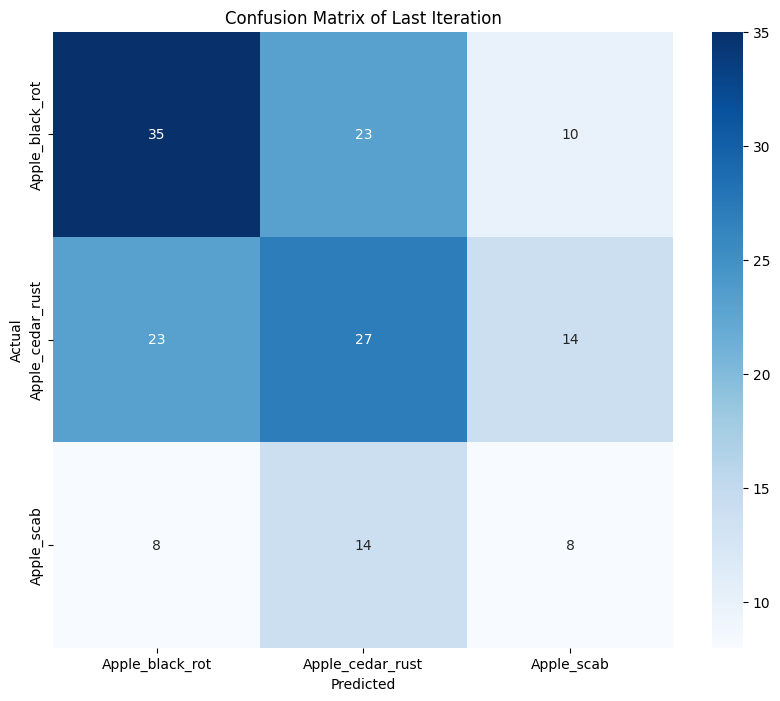

Classification Report of Last Iteration:
                  precision    recall  f1-score   support

 Apple_black_rot       0.53      0.51      0.52        68
Apple_cedar_rust       0.42      0.42      0.42        64
      Apple_scab       0.25      0.27      0.26        30

        accuracy                           0.43       162
       macro avg       0.40      0.40      0.40       162
    weighted avg       0.44      0.43      0.43       162



In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.models import Model, load_model
import os

# Set parameters
batch_size = 32
input_shape = (224, 224, 3)
num_epochs = 10

# Load data
DATASET = "/content/drive/MyDrive/apple-leaf-disease (1)"
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(DATASET,
                                                    target_size=(224, 224),
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    subset='training')

validation_generator = train_datagen.flow_from_directory(DATASET,
                                                         target_size=(224, 224),
                                                         batch_size=batch_size,
                                                         class_mode='categorical',
                                                         subset='validation')

# Function to create the model
def create_model():
    base_model = MobileNet(weights='imagenet', include_top=False, input_shape=input_shape)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(train_generator.num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    for layer in base_model.layers:
        layer.trainable = False
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train the model 5 times and store results
results = []
all_confusion_matrices = []

for i in range(5):
    print(f"Training iteration {i+1}")
    model = create_model()
    history = model.fit(train_generator,
                        epochs=num_epochs,
                        validation_data=validation_generator,
                        verbose=1)
    val_acc = history.history['val_accuracy'][-1]
    results.append(val_acc)
    print(f"Iteration {i+1} Validation Accuracy: {val_acc}")

    # Predict the validation data
    y_val_pred = model.predict(validation_generator)
    y_val_pred_classes = np.argmax(y_val_pred, axis=1)
    y_val_true_classes = validation_generator.classes

    # Compute confusion matrix
    cm = confusion_matrix(y_val_true_classes, y_val_pred_classes)
    all_confusion_matrices.append(cm)

# Display results
print("Validation Accuracies for 2 iterations:", results)
print("Mean Validation Accuracy:", np.mean(results))
print("Standard Deviation of Validation Accuracy:", np.std(results))

# Plot confusion matrix of the last iteration
plt.figure(figsize=(10, 8))
sns.heatmap(all_confusion_matrices[-1], annot=True, fmt="d", cmap="Blues", xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
plt.title("Confusion Matrix of Last Iteration")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# Overall classification report for the last iteration
print("Classification Report of Last Iteration:")
print(classification_report(y_val_true_classes, y_val_pred_classes, target_names=list(validation_generator.class_indices.keys())))